# Model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load images w/ Pytorch 

In [3]:
batch_size = 20

dataset_path = "/kaggle/input/face-mask-lite-dataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset_folder = datasets.ImageFolder(root=dataset_path, transform=transform)

num_training_samples = 10
subset_dataset, _ = random_split(dataset_folder, [num_training_samples, len(dataset_folder) - num_training_samples])

data_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)

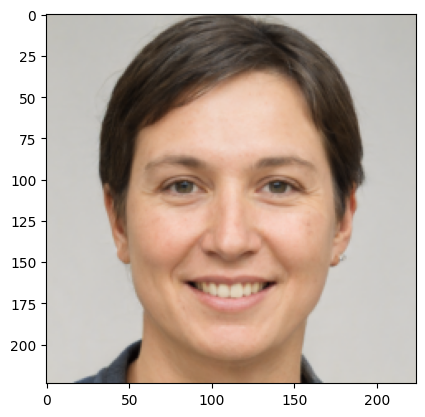

In [4]:
img, _ = next(iter(data_loader))
plt.imshow(img[0].permute(1, 2, 0).numpy())

In [5]:
class_to_idx = dataset_folder.class_to_idx

for class_name, class_index in class_to_idx.items():
    class_count = sum(1 for _, label in subset_dataset if label == class_index)
    print(f"{class_name} : {class_count}")

with_mask : 5
without_mask : 5


In [6]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None, target_class=None):
        self.root_dir = root_dir
        self.transform = transform

        # Liste oluştur ve sadece hedef sınıfa ait dosyaları ekleyerek filtrele
        self.file_list = [filename for filename in os.listdir(root_dir)]

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_list[idx])
        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

# Belirli sınıfın yolu
with_mask_path = "/kaggle/input/face-mask-lite-dataset/with_mask"

# Dataset ve DataLoader oluştur
custom_dataset = CustomDataset(root_dir=with_mask_path, transform=transform)
custom_data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [7]:
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    for data in custom_data_loader:
        images = data
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/5, Loss: 0.001167042413726449
Epoch 2/5, Loss: 0.00073924072785303
Epoch 3/5, Loss: 0.0006637076730839908
Epoch 4/5, Loss: 0.0005099030677229166
Epoch 5/5, Loss: 0.00038726083585061133


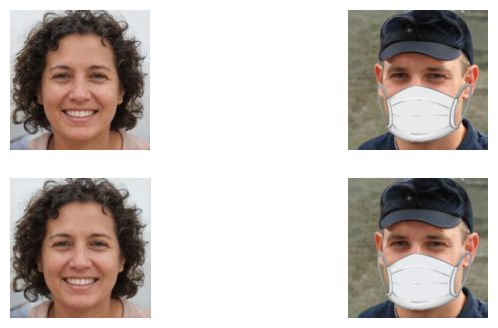

In [8]:
dataiter = iter(data_loader)
images, _ = next(dataiter)

with torch.no_grad():
    decoded_images = autoencoder(images)

plt.figure(figsize=(8, 4))

for i in range(2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(2, 2, i + 3)
    plt.imshow(decoded_images[i].permute(1, 2, 0).numpy())
    plt.axis('off')

plt.show()

# Load with_mask images w/ glob

In [9]:
import glob
from PIL import Image

with_mask_path = "/kaggle/input/face-mask-lite-dataset/with_mask/*.png"

image_paths = glob.glob(with_mask_path)

images = [Image.open(img_path) for img_path in image_paths]

In [10]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [11]:
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    for data in data_loader:
        images, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/5, Loss: 0.06972359120845795
Epoch 2/5, Loss: 0.0692809522151947
Epoch 3/5, Loss: 0.06831788271665573
Epoch 4/5, Loss: 0.06606100499629974
Epoch 5/5, Loss: 0.06194358319044113


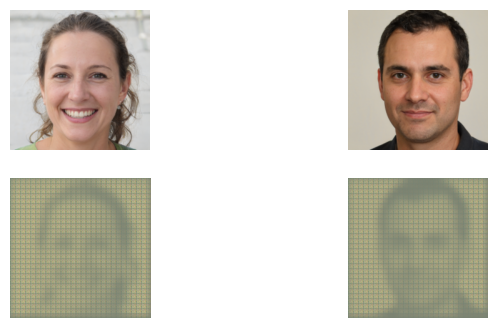

In [12]:
dataiter = iter(data_loader)
images, _ = next(dataiter)

with torch.no_grad():
    decoded_images = autoencoder(images)

plt.figure(figsize=(8, 4))

for i in range(2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(2, 2, i + 3)
    plt.imshow(decoded_images[i].permute(1, 2, 0).numpy())
    plt.axis('off')

plt.show()

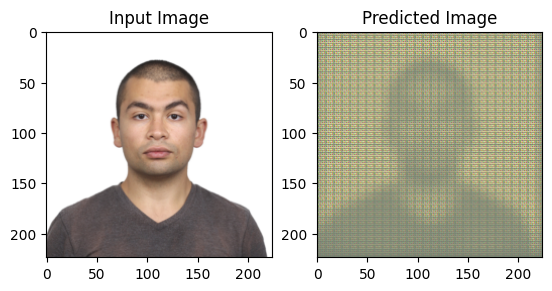

In [19]:
import torch
from torchvision import transforms
from PIL import Image

# Modeli test moduna geçir
autoencoder.eval()

# Tahmin edilecek görseli yükle ve dönüştür
image_path = "/kaggle/input/tunahan/VESIKALIK PASAPORT copy.jpg"
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])
input_image = transform(Image.open(image_path).convert("RGB")).unsqueeze(0)

# Model üzerinden tahmin yap
with torch.no_grad():
    predicted_image = autoencoder(input_image)

# Tahmin edilen görseli göster
import matplotlib.pyplot as plt

input_image = input_image.squeeze(0).permute(1, 2, 0).numpy()
predicted_image = predicted_image.squeeze(0).permute(1, 2, 0).numpy()

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(predicted_image)
plt.title("Predicted Image")

plt.show()

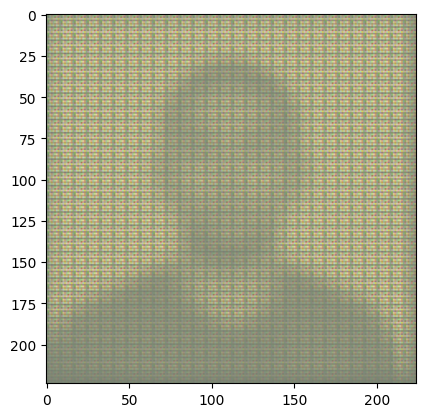

In [21]:
plt.imshow(predicted_image);
plt.savefig("/kaggle/working/pred.jpg")